In [1]:
pip install some_package

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
# preprocessing
import re
import string
import itertools # for flattening
# nltk library
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize, regexp_tokenize, RegexpTokenizer
from nltk.corpus import stopwords
from nltk import FreqDist
from wordcloud import WordCloud
from nltk.stem.wordnet import WordNetLemmatizer as wn
from nltk.corpus import wordnet
from nltk import pos_tag
from nltk.util import ngrams
nltk.download('punkt', quiet=True)
nltk.download('stopwords')
nltk.download('words')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
# sklearn library
from sklearn.model_selection import train_test_split
from sklearn.base import TransformerMixin, BaseEstimator
#modeling and dimensionality reduction for visuaization
from sklearn.decomposition import NMF
from sklearn.manifold import TSNE

[nltk_data] Downloading package stopwords to /Users/Shen/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to /Users/Shen/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/Shen/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /Users/Shen/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [4]:
#import csv - glassdoor review for citi bank
data=pd.read_csv('FinalGlassdoorReview.csv')
data.head(5)

,Title,Date,Rating,Pros,Cons
0,great experience at citi !,"May 8, 2022 -",5.0,great place to work and learn!,tough deadlines at times !!
1,Solid employer,"Dec 11, 2022 - Vice President",5.0,"Great people, collaboration through department...","Large company, difficult to affect change mean..."
2,Branch Experience,"Jan 5, 2023 - Personal Banker",4.0,Genuinely a good company to work for. Best pay...,Constant system issues. Old technology. Compan...
3,Could be a fantastic company to work for....,"Jan 16, 2023 - Bankruptcy Specialist 3",4.0,Great pay and benefits for entry-level Most ma...,Raises were low. Quite a few managers and lead...
4,Great Company,"Jan 19, 2023 - Senior Trainer - Learning & Dev...",4.0,"It's always the people that you work with, you...",Salary transparency for employees who have bee...


In [5]:
#Separate date to two columns - data and title
data['job_title']=data['Date'].str.split('-', 1).str[1]

In [6]:
data['date']=data['Date'].str.split('-', 1).str[0]

In [7]:
data=data.rename(columns={'Date':'date_job'})

In [8]:
data.head()

,Title,date_job,Rating,Pros,Cons,job_title,date
0,great experience at citi !,"May 8, 2022 -",5.0,great place to work and learn!,tough deadlines at times !!,,"May 8, 2022"
1,Solid employer,"Dec 11, 2022 - Vice President",5.0,"Great people, collaboration through department...","Large company, difficult to affect change mean...",Vice President,"Dec 11, 2022"
2,Branch Experience,"Jan 5, 2023 - Personal Banker",4.0,Genuinely a good company to work for. Best pay...,Constant system issues. Old technology. Compan...,Personal Banker,"Jan 5, 2023"
3,Could be a fantastic company to work for....,"Jan 16, 2023 - Bankruptcy Specialist 3",4.0,Great pay and benefits for entry-level Most ma...,Raises were low. Quite a few managers and lead...,Bankruptcy Specialist 3,"Jan 16, 2023"
4,Great Company,"Jan 19, 2023 - Senior Trainer - Learning & Dev...",4.0,"It's always the people that you work with, you...",Salary transparency for employees who have bee...,Senior Trainer - Learning & Development,"Jan 19, 2023"


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25890 entries, 0 to 25889
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Title      25773 non-null  object 
 1   date_job   25890 non-null  object 
 2   Rating     25890 non-null  float64
 3   Pros       25890 non-null  object 
 4   Cons       25890 non-null  object 
 5   job_title  25890 non-null  object 
 6   date       25890 non-null  object 
dtypes: float64(1), object(6)
memory usage: 1.4+ MB


In [10]:
data.isnull().sum()

Title        117
date_job       0
Rating         0
Pros           0
Cons           0
job_title      0
date           0
dtype: int64

In [11]:
data=data.dropna()

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25773 entries, 0 to 25889
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Title      25773 non-null  object 
 1   date_job   25773 non-null  object 
 2   Rating     25773 non-null  float64
 3   Pros       25773 non-null  object 
 4   Cons       25773 non-null  object 
 5   job_title  25773 non-null  object 
 6   date       25773 non-null  object 
dtypes: float64(1), object(6)
memory usage: 1.6+ MB


In [13]:
data['date']=pd.to_datetime(data['date'])

In [14]:
#Remove special characters
from nltk.stem import PorterStemmer
tokenizer = RegexpTokenizer("([a-zA-Z]+(?:'[a-z]+)?)")
stopwords_list = stopwords.words('english')
otherstopwords=['citi,great,good,company,bank,citibank']
stemmer = PorterStemmer()

In [15]:
def preprocess_text(text, tokenizer, stopwords_list, stemmer):
    # Standardize case (lowercase the text)
    text_lower=text.lower()
    # Tokenize text using `tokenizer`
    text_tokenizer=tokenizer.tokenize(text_lower)
    # Remove stopwords using `stopwords_list`
    text_stop_words=[word for word in text_tokenizer if word not in stopwords_list]
    # Stem the tokenized text using `stemmer`
    stemmer=[stemmer.stem(text) for text in text_stop_words]
    # Return the preprocessed text
    return stemmer
preprocess_text("This is an example sentence for preprocessing.", tokenizer, stopwords_list, stemmer)

['exampl', 'sentenc', 'preprocess']

In [16]:
convobj=['Title','Pros','Cons']

text=[data[f].apply(lambda x : preprocess_text(x,tokenizer,stopwords_list,stemmer)) for f in convobj]

In [17]:
text[0]

0                  [great, experi, citi]
1                        [solid, employ]
2                       [branch, experi]
3        [could, fantast, compani, work]
4                       [great, compani]
                      ...               
25885                                 []
25886                              [avp]
25887                          [analyst]
25888                     [vice, presid]
25889                         [ghjjjnbv]
Name: Title, Length: 25773, dtype: object

In [18]:
process_data=pd.DataFrame(data=text)

In [19]:
process_data=process_data.transpose()

In [20]:
process_data=process_data.rename(columns=({'Title':'txtTitle','Pros':'txtPros','Cons':'txtCons'}))

In [21]:
process_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25773 entries, 0 to 25889
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   txtTitle  25773 non-null  object
 1   txtPros   25773 non-null  object
 2   txtCons   25773 non-null  object
dtypes: object(3)
memory usage: 1.8+ MB


In [22]:
process_data.head()

,txtTitle,txtPros,txtCons
0,"[great, experi, citi]","[great, place, work, learn]","[tough, deadlin, time]"
1,"[solid, employ]","[great, peopl, collabor, depart, except]","[larg, compani, difficult, affect, chang, mean..."
2,"[branch, experi]","[genuin, good, compani, work, best, pay, indus...","[constant, system, issu, old, technolog, compa..."
3,"[could, fantast, compani, work]","[great, pay, benefit, entri, level, manag, awe...","[rais, low, quit, manag, lead, rude, thought, ..."
4,"[great, compani]","[alway, peopl, work, peer, make, go, work, bet...","[salari, transpar, employe, role, prior, pay, ..."


In [23]:
new_df=pd.concat([data,process_data],axis=1)

In [24]:
new_df.head()

,Title,date_job,Rating,Pros,Cons,job_title,date,txtTitle,txtPros,txtCons
0,great experience at citi !,"May 8, 2022 -",5.0,great place to work and learn!,tough deadlines at times !!,,2022-05-08,"[great, experi, citi]","[great, place, work, learn]","[tough, deadlin, time]"
1,Solid employer,"Dec 11, 2022 - Vice President",5.0,"Great people, collaboration through department...","Large company, difficult to affect change mean...",Vice President,2022-12-11,"[solid, employ]","[great, peopl, collabor, depart, except]","[larg, compani, difficult, affect, chang, mean..."
2,Branch Experience,"Jan 5, 2023 - Personal Banker",4.0,Genuinely a good company to work for. Best pay...,Constant system issues. Old technology. Compan...,Personal Banker,2023-01-05,"[branch, experi]","[genuin, good, compani, work, best, pay, indus...","[constant, system, issu, old, technolog, compa..."
3,Could be a fantastic company to work for....,"Jan 16, 2023 - Bankruptcy Specialist 3",4.0,Great pay and benefits for entry-level Most ma...,Raises were low. Quite a few managers and lead...,Bankruptcy Specialist 3,2023-01-16,"[could, fantast, compani, work]","[great, pay, benefit, entri, level, manag, awe...","[rais, low, quit, manag, lead, rude, thought, ..."
4,Great Company,"Jan 19, 2023 - Senior Trainer - Learning & Dev...",4.0,"It's always the people that you work with, you...",Salary transparency for employees who have bee...,Senior Trainer - Learning & Development,2023-01-19,"[great, compani]","[alway, peopl, work, peer, make, go, work, bet...","[salari, transpar, employe, role, prior, pay, ..."


In [25]:
new_df['Year']=pd.DatetimeIndex(new_df['date']).year

In [26]:
# takes in untokenized document and returns fully normalized token list
from nltk import WordNetLemmatizer # lemmatizer using WordNet
from nltk.corpus import wordnet # imports WordNet


def pos_tagger(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:         
        return None

In [27]:
title_tagged = list(map(lambda x: (x[0], pos_tagger(x[1])), pos_tag(new_df['txtTitle'][1]))) 
print(title_tagged)

[('solid', 'a'), ('employ', 'n')]


In [28]:
wnl=WordNetLemmatizer()
doc_lemmatized=[wnl.lemmatize(token,pos)for token,pos in title_tagged if pos is not None]
print(doc_lemmatized)

['solid', 'employ']


IndexError: index 7 is out of bounds for axis 0 with size 7

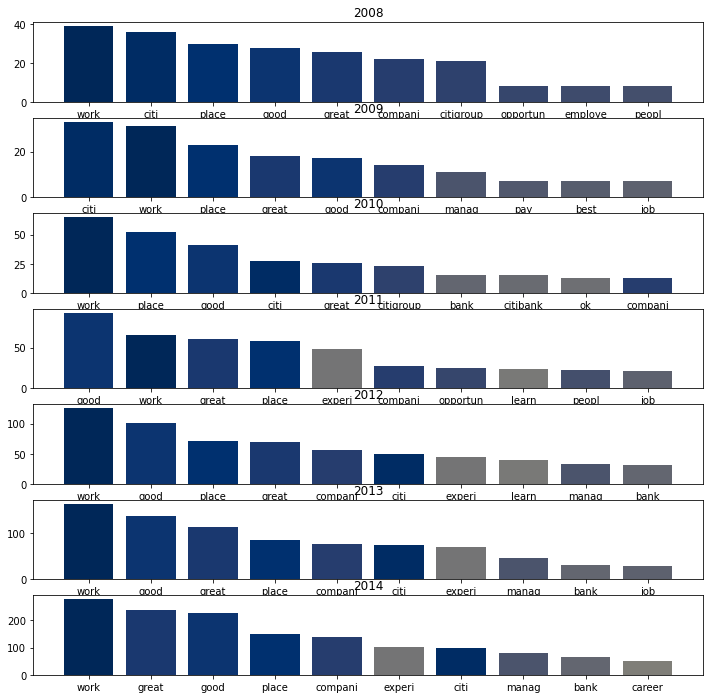

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up figure and axes
fig, axes = plt.subplots(nrows=7, figsize=(12, 12))

# Empty dict to hold words that have already been plotted and their colors
plotted_words_and_colors = {}
# Establish color palette to pull from
# (If you get an error message about popping from an empty list, increase this #)
color_palette = sns.color_palette('cividis', n_colors=38)

# Creating a plot for each year
data_by_year = [y for _,y in new_df.groupby('Year', sort=True, as_index=False)]

for idx, year_df in enumerate(data_by_year):
    # Find top 10 words in this year
    all_words_in_year = year_df.txtTitle.explode()
    top_10 = all_words_in_year.value_counts()[:10]
    
    # Select appropriate colors, reusing colors if words repeat
    colors = []
    for word in top_10.index:
        if word not in plotted_words_and_colors:
            new_color = color_palette.pop(0)
            plotted_words_and_colors[word] = new_color
        colors.append(plotted_words_and_colors[word])
    
    # Select axes, plot data, set title
    ax = axes[idx]
    ax.bar(top_10.index, top_10.values, color=colors)
    ax.set_title(year_df.iloc[0].Year)
    
fig.tight_layout()

In [30]:
# additional argument sets cut off minimum length for tokenized text at which function converts to null string.
def process_text(text, min_length):
    
    # get common stop words that we'll remove during tokenization/text normalization
    stop_words = stopwords.words('english')

    #initialize lemmatizer
    wnl = WordNetLemmatizer()

    # helper function to change nltk's part of speech tagging to a wordnet format.
    def pos_tagger(nltk_tag):
        if nltk_tag.startswith('J'):
            return wordnet.ADJ
        elif nltk_tag.startswith('V'):
            return wordnet.VERB
        elif nltk_tag.startswith('N'):
            return wordnet.NOUN
        elif nltk_tag.startswith('R'):
            return wordnet.ADV
        else:         
            return None
   

    # lower case everything
    txt_lower = text.lower()

    #remove mentions, hashtags, and urls, strip whitspace and breaks
    txt_lower = re.sub(r"@[a-z0-9_]+|#[a-z0-9_]+|http\S+", "", txt_lower).strip().replace("\r", "").replace("\n", "").replace("\t", "")
    
    
    # remove stop words and punctuations 
    txt_norm = [x for x in word_tokenize(txt_lower) if ((x.isalpha()) & (x not in stop_words)) & (x not in ['good','great','found','irish','company','lot'])]

    #  POS detection on the result will be important in telling Wordnet's lemmatizer how to lemmatize
    
    # creates list of tuples with tokens and POS tags in wordnet format
    txt_tagged = list(map(lambda x: (x[0], pos_tagger(x[1])), pos_tag(txt_norm))) 

    # now we are going to have a cutoff here. any tokenized cocument with length < min length will be removed from corpus
    if len(txt_tagged) <= min_length:
        return ''
    else:
         # rejoins lemmatized sentence 
        txt_norm = " ".join([wnl.lemmatize(x[0], x[1]) for x in txt_tagged if x[1] is not None])
        return txt_norm


In [31]:
new_df['Pros'] = new_df['Pros'].apply(process_text, args = [4])
new_df['Cons'] = new_df['Cons'].apply(process_text, args = [4])
new_df['Title'] = new_df['Title'].apply(process_text, args = [4])

In [32]:
process_text_pros = new_df[new_df['Pros'] != '']
process_text_cons =new_df[new_df['Cons'] != '']
process_text_title=new_df[new_df['Title'] != '']

In [33]:
type(new_df)

pandas.core.frame.DataFrame

In [34]:
pip install pandas --upgrade


Requirement already up-to-date: pandas in /Users/Shen/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages (1.5.3)
Note: you may need to restart the kernel to use updated packages.


In [35]:
new_df.to_csv('cleanedreview.csv',index=False)

## Feature Construction - Pros


In [36]:
# feature construction - Pros
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = new_df['Pros']
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(corpus)
X_train

<25773x7160 sparse matrix of type '<class 'numpy.float64'>'
	with 129973 stored elements in Compressed Sparse Row format>

In [37]:
len(vectorizer.get_feature_names())

7160

In [38]:
from sklearn.decomposition import NMF
from sklearn.manifold import TSNE

topic_model = NMF(n_components = 5)
topic_model.fit(X_train)

NMF(n_components=5)

In [39]:
H = topic_model.transform(X_train) # transform document into topic vector representation

# to get W 
W = topic_model.components_ # word component weights for each topic

print("Shape of W is " + str(W.shape))
print("Shape of H is " + str(H.shape))
print("Shape of X_train is " + str(X_train.shape))

Shape of W is (5, 7160)
Shape of H is (25773, 5)
Shape of X_train is (25773, 7160)


In [40]:
for index,topic in enumerate(W):
    print(f'THE TOP 10 WORDS FOR TOPIC #{index}')
    print([vectorizer.get_feature_names()[i] for i in topic.argsort()[-25:]])
    print('\n')

THE TOP 10 WORDS FOR TOPIC #0
['leaf', 'support', 'stability', 'much', 'policy', 'salary', 'quality', 'value', 'technology', 'personal', 'diversity', 'team', 'compensation', 'decent', 'best', 'growth', 'excellent', 'mobility', 'remote', 'flexibility', 'management', 'culture', 'work', 'life', 'balance']


THE TOP 10 WORDS FOR TOPIC #1
['organization', 'culture', 'new', 'diversity', 'job', 'brand', 'development', 'business', 'citi', 'experience', 'different', 'internal', 'move', 'exposure', 'large', 'grow', 'bank', 'mobility', 'lot', 'many', 'growth', 'career', 'learn', 'global', 'opportunity']


THE TOP 10 WORDS FOR TOPIC #2
['match', 'care', 'bonus', 'excellent', 'package', 'location', 'medical', 'management', 'job', 'holiday', 'flexibility', 'leave', 'well', 'hour', 'insurance', 'day', 'health', 'employee', 'competitive', 'vacation', 'decent', 'salary', 'time', 'pay', 'benefit']


THE TOP 10 WORDS FOR TOPIC #3
['experience', 'salary', 'hard', 'working', 'excellent', 'get', 'manager', 

In [41]:
%%capture topic_word_plot
def plot_top_words(W, feature_names, n_top_words, title):
    fig, axes = plt.subplots(1, 5, figsize=(15, 8), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(W):
        top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 20})
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=15)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=25)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

n_top_words = 20
tfidf_feature_names = vectorizer.get_feature_names()
plot_top_words(W, tfidf_feature_names, n_top_words, "Topics in NMF model")

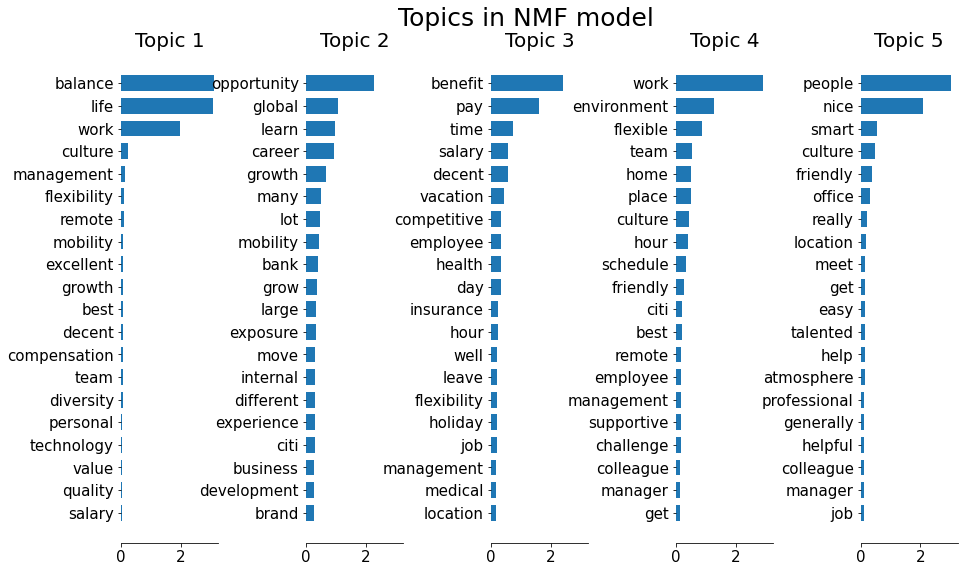

In [42]:
topic_word_plot()

In [43]:
# # feed the LDA model into the pyLDAvis instance
# vis = pyLDAvis.sklearn.prepare(topic_model, X_train, vectorizer)
# pyLDAvis.display(vis)
# pyLDAvis.save_html(vis, 'nmf_topics.html')

In [44]:
topic_name_dict = {0: 'work_life_balance', 1: 'learning_opportunities', 2: 'benefit_pay', 3: 'flexible_work_environment', 4: 'nice_smart_people'}

In [45]:
topic_keys = topic_name_dict.values()


In [46]:
H[10,:]

array([0.07172892, 0.00814124, 0.00905423, 0.02472462, 0.00052823])

In [47]:
list(zip(topic_name_dict.values(), list(H[2,:])))

[('work_life_balance', 0.0030978651814000746),
 ('learning_opportunities', 0.008907975137758197),
 ('benefit_pay', 0.07217912252849923),
 ('flexible_work_environment', 0.016967276957696276),
 ('nice_smart_people', 0.0)]

In [48]:
coefdistribution=pd.DataFrame(H, columns = topic_keys)
coefdistribution

,work_life_balance,learning_opportunities,benefit_pay,flexible_work_environment,nice_smart_people
0,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.003098,0.008908,0.072179,0.016967,0.000000
3,0.001501,0.000000,0.056232,0.032464,0.001173
4,0.007249,0.000000,0.000000,0.060861,0.052144
...,...,...,...,...,...
25768,0.000000,0.000000,0.000000,0.000000,0.000000
25769,0.000000,0.032980,0.007540,0.002344,0.000311
25770,0.000000,0.000000,0.000000,0.000000,0.000000
25771,0.000000,0.000000,0.000000,0.000000,0.000000


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'work_life_balance'),
  Text(1, 0, 'learning_opportunities'),
  Text(2, 0, 'benefit_pay'),
  Text(3, 0, 'flexible_work_environment'),
  Text(4, 0, 'nice_smart_people')])

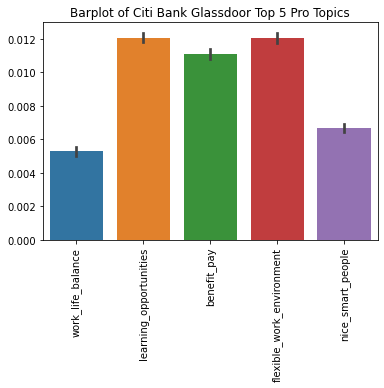

In [49]:
plt.title('Barplot of Citi Bank Glassdoor Top 5 Pro Topics')

sns.barplot(data=coefdistribution)

plt.xticks(rotation=90)

In [50]:
from sklearn.manifold import TSNE


In [51]:
tsne = TSNE(random_state=42, learning_rate=100)
tsne_trans = tsne.fit_transform(H)
tsne_trans = pd.DataFrame(tsne_trans, columns = ['TSNE1', 'TSNE2'])

In [52]:
tsne_trans['class'] = np.argmax(H, axis = 1)
tsne_trans['class'] = tsne_trans['class'].replace(topic_name_dict)

In [53]:
tsne_trans

,TSNE1,TSNE2,class
0,-1.071117,15.934940,work_life_balance
1,-1.637170,16.235971,work_life_balance
2,48.503490,-10.476992,benefit_pay
3,43.009003,-2.701154,benefit_pay
4,-34.162540,0.216619,flexible_work_environment
...,...,...,...
25768,-1.616074,16.218771,work_life_balance
25769,-1.856779,-49.195461,learning_opportunities
25770,-1.255908,15.999331,work_life_balance
25771,-1.141926,15.955921,work_life_balance


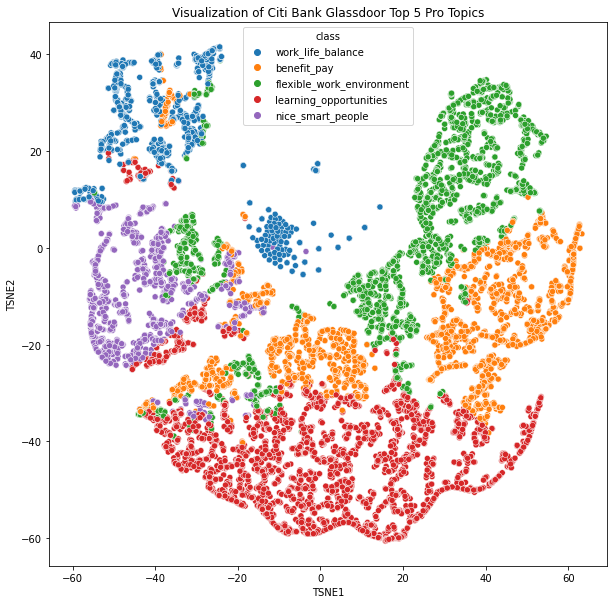

In [54]:
plt.figure(figsize=(10,10))
sns.scatterplot(x = 'TSNE1', y = 'TSNE2', hue = 'class', data = tsne_trans, palette = 'tab10')
plt.title('Visualization of Citi Bank Glassdoor Top 5 Pro Topics')
plt.show()

## Feature Construction - Cons


In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer

corpus_cons = new_df['Cons']
vectorizer = TfidfVectorizer()
X_train_cons = vectorizer.fit_transform(corpus_cons)
X_train_cons

<25773x10266 sparse matrix of type '<class 'numpy.float64'>'
	with 189916 stored elements in Compressed Sparse Row format>

In [56]:
from sklearn.decomposition import NMF
from sklearn.manifold import TSNE

topic_model = NMF(n_components = 5)
topic_model.fit(X_train_cons)

NMF(n_components=5)

In [57]:
H_cons = topic_model.transform(X_train_cons) # transform document into topic vector representation

# to get W 
W_cons = topic_model.components_ # word component weights for each topic

print("Shape of W is " + str(W_cons.shape))
print("Shape of H is " + str(H_cons.shape))
print("Shape of X_train is " + str(X_train_cons.shape))

Shape of W is (5, 10266)
Shape of H is (25773, 5)
Shape of X_train is (25773, 10266)


In [58]:
for index,topic in enumerate(W_cons):
    print(f'THE TOP 10 WORDS FOR TOPIC #{index}')
    print([vectorizer.get_feature_names()[i] for i in topic.argsort()[-25:]])
    print('\n')

THE TOP 10 WORDS FOR TOPIC #0
['compensation', 'personal', 'issue', 'better', 'expect', 'workload', 'challenge', 'difficult', 'team', 'heavy', 'weekend', 'overtime', 'hard', 'load', 'environment', 'need', 'much', 'improve', 'culture', 'bad', 'poor', 'pressure', 'balance', 'life', 'work']


THE TOP 10 WORDS FOR TOPIC #1
['need', 'team', 'process', 'slow', 'big', 'sometimes', 'citi', 'year', 'difficult', 'move', 'large', 'manager', 'do', 'change', 'job', 'take', 'much', 'hard', 'make', 'thing', 'work', 'many', 'people', 'time', 'get']


THE TOP 10 WORDS FOR TOPIC #2
['require', 'competitive', 'workload', 'repetitive', 'demand', 'stress', 'extra', 'overtime', 'holiday', 'pressure', 'expect', 'need', 'pay', 'week', 'stressful', 'day', 'environment', 'high', 'weekend', 'sometimes', 'time', 'working', 'work', 'long', 'hour']


THE TOP 10 WORDS FOR TOPIC #3
['base', 'advancement', 'level', 'industry', 'increment', 'slow', 'competitive', 'average', 'bank', 'high', 'increase', 'raise', 'benefit

In [59]:
%%capture topic_word_plot
def plot_top_words(W_cons, feature_names, n_top_words, title):
    fig, axes = plt.subplots(1, 5, figsize=(15, 8), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(W_cons):
        top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 20})
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=15)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=25)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

n_top_words = 20
tfidf_feature_names = vectorizer.get_feature_names()
plot_top_words(W_cons, tfidf_feature_names, n_top_words, "Topics in Citi Review for Cons")

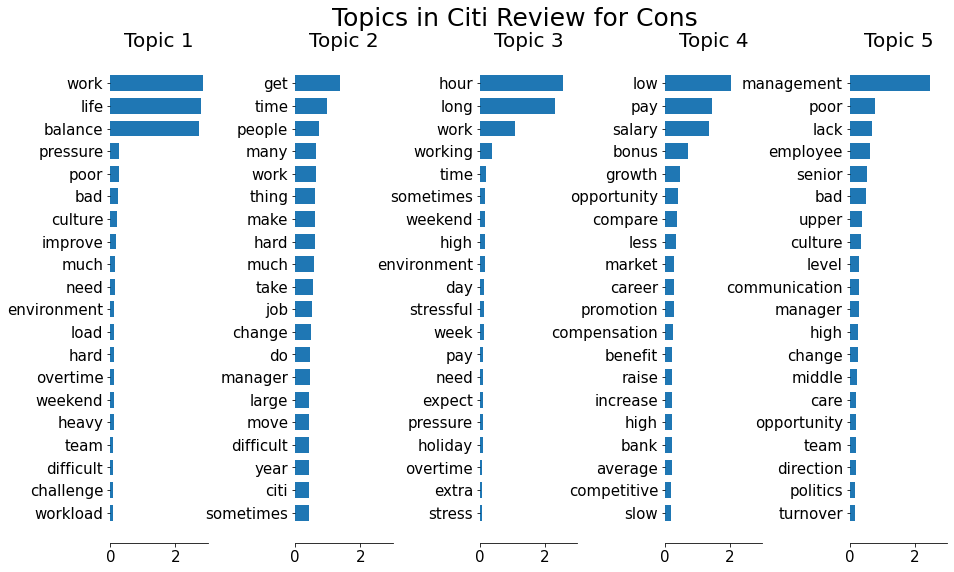

In [60]:
topic_word_plot()

In [61]:
topic_name_dict_cons = {0: 'work_pressure', 1: 'tight_deadline', 2: 'long_work_hours', 3: 'low_bonus_salary', 4: 'lack_management_communication'}

In [62]:
topic_keys_cons = topic_name_dict_cons.values()
coefdistribution_cons=pd.DataFrame(H_cons, columns = topic_keys_cons)
coefdistribution_cons

,work_pressure,tight_deadline,long_work_hours,low_bonus_salary,lack_management_communication
0,0.00000,0.000000,0.000000,0.000000,0.000000
1,0.00000,0.033050,0.000000,0.000000,0.000271
2,0.01903,0.071506,0.010560,0.009377,0.019814
3,0.00000,0.032056,0.000000,0.057990,0.000265
4,0.00927,0.013652,0.005306,0.040233,0.015828
...,...,...,...,...,...
25768,0.00000,0.000000,0.000000,0.000000,0.000000
25769,0.00000,0.000000,0.000000,0.000000,0.000000
25770,0.00000,0.007310,0.000000,0.088831,0.000000
25771,0.00000,0.000000,0.000000,0.000000,0.000000


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'work_pressure'),
  Text(1, 0, 'tight_deadline'),
  Text(2, 0, 'long_work_hours'),
  Text(3, 0, 'low_bonus_salary'),
  Text(4, 0, 'lack_management_communication')])

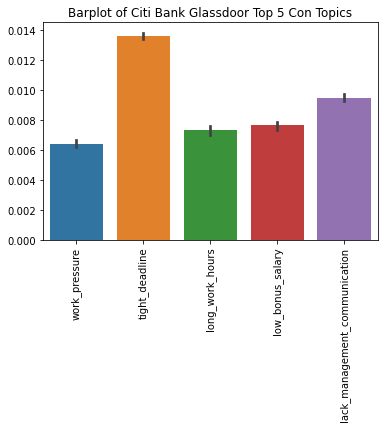

In [63]:
plt.title('Barplot of Citi Bank Glassdoor Top 5 Con Topics')

sns.barplot(data=coefdistribution_cons)

plt.xticks(rotation=90)

In [64]:
# def review_breakdown(locator):

#     int_index = new_df.index.get_loc(locator)

#     topic_keys = topic_name_dict.values()
#     zipped_tuple = list(zip(topic_keys, list(H[int_index,:])))

#     topic_breakdown = pd.DataFrame(zipped_tuple, columns = ['Topic', 'Weight']).set_index(['Topic'])
#     topic_breakdown['Normalized weight'] = topic_breakdown['Weight']/topic_breakdown['Weight'].sum()

#     sns.barplot(y = topic_breakdown.index, x = 'Normalized weight', data = topic_breakdown)
#     plt.title("Distribution of topics for tweet no. " + str(locator))
#     plt.show()

#     return topic_breakdown

## Topics Trend 5 Year - 2017 - 2022

In [66]:
trend_df=new_df.loc[new_df['Year']>2017]

In [67]:
trend_df=trend_df.sort_values(by='Year',ascending=False)

In [68]:
trend_df['Pros'] = trend_df['Pros'].apply(process_text, args = [4])
trend_df['Cons'] = trend_df['Cons'].apply(process_text, args = [4])
trend_df['Title'] = trend_df['Title'].apply(process_text, args = [4])

In [69]:
trend_df_pros = trend_df[trend_df['Pros'] != '']
trend_df_cons =trend_df[trend_df['Cons'] != '']
trend_df_title=trend_df[trend_df['Title'] != '']

In [70]:
years=trend_df['Year'].unique()
years

array([2023, 2022, 2021, 2020, 2019, 2018])

In [71]:
def keyword_year(year):
    yeardata=trend_df.loc[trend_df['Year']==year]
    corpus = yeardata['Pros']
    vectorizer = TfidfVectorizer()
    X_train = vectorizer.fit_transform(corpus)
    
    topic_model = NMF(n_components =5)
    topic_model.fit(X_train)
        
    H = topic_model.transform(X_train) # transform document into topic vector representation

    W = topic_model.components_ # word component weights for each topic
    
    for index,topic in enumerate(W):
        featurenames=[vectorizer.get_feature_names()[i] for i in topic.argsort()[-5:]]
        print(f'For year {year}, the top 3 words for topic #{index}: ',featurenames)

    return 

In [72]:
prokeyword=[keyword_year(y) for y in years]

For year 2023, the top 3 words for topic #0:  ['employee', 'growth', 'work', 'life', 'balance']
For year 2023, the top 3 words for topic #1:  ['research', 'many', 'global', 'learn', 'opportunity']
For year 2023, the top 3 words for topic #2:  ['hybrid', 'hour', 'team', 'flexible', 'work']
For year 2023, the top 3 words for topic #3:  ['gd', 'medical', 'especially', 'management', 'benefit']
For year 2023, the top 3 words for topic #4:  ['international', 'professional', 'work', 'people', 'environment']
For year 2022, the top 3 words for topic #0:  ['flexibility', 'team', 'work', 'balance', 'life']
For year 2022, the top 3 words for topic #1:  ['time', 'salary', 'decent', 'pay', 'benefit']
For year 2022, the top 3 words for topic #2:  ['place', 'environment', 'flexible', 'culture', 'work']
For year 2022, the top 3 words for topic #3:  ['global', 'learn', 'growth', 'career', 'opportunity']
For year 2022, the top 3 words for topic #4:  ['environment', 'office', 'salary', 'nice', 'people']
F

In [85]:
def keyword_year(year):
    yeardata=trend_df.loc[trend_df['Year']==year]
    corpus = yeardata['Cons']
    vectorizer = TfidfVectorizer()
    X_train = vectorizer.fit_transform(corpus)
    
    topic_model = NMF(n_components =5)
    topic_model.fit(X_train)
        
    H = topic_model.transform(X_train) # transform document into topic vector representation

    W = topic_model.components_ # word component weights for each topic
    
    for index,topic in enumerate(W):
        featurenames=[vectorizer.get_feature_names()[i] for i in topic.argsort()[-5:]]
        print(f'For year {year}, the top 5 words for Cons #{index}: ',featurenames)

    return 

In [86]:
conkeyword=[keyword_year(y) for y in years]

For year 2023, the top 5 words for Cons #0:  ['organisation', 'heavy', 'life', 'balance', 'work']
For year 2023, the top 5 words for Cons #1:  ['peak', 'time', 'work', 'long', 'hour']
For year 2023, the top 5 words for Cons #2:  ['local', 'bonus', 'growth', 'increment', 'low']
For year 2023, the top 5 words for Cons #3:  ['questionable', 'expect', 'career', 'culture', 'bad']
For year 2023, the top 5 words for Cons #4:  ['pay', 'full', 'employee', 'get', 'time']
For year 2022, the top 5 words for Cons #0:  ['pressure', 'poor', 'work', 'balance', 'life']
For year 2022, the top 5 words for Cons #1:  ['weekend', 'environment', 'work', 'long', 'hour']
For year 2022, the top 5 words for Cons #2:  ['team', 'slow', 'work', 'time', 'get']
For year 2022, the top 5 words for Cons #3:  ['market', 'bonus', 'pay', 'salary', 'low']
For year 2022, the top 5 words for Cons #4:  ['lack', 'culture', 'bad', 'poor', 'management']
For year 2021, the top 5 words for Cons #0:  ['bad', 'pressure', 'work', 'bal

In [87]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Set up figure and axes
# fig, axes = plt.subplots(nrows=7, figsize=(12, 12))

# # Empty dict to hold words that have already been plotted and their colors
# plotted_words_and_colors = {}
# # Establish color palette to pull from
# # (If you get an error message about popping from an empty list, increase this #)
# color_palette = sns.color_palette('cividis', n_colors=38)

# # Creating a plot for each year
# data_by_year = [y for _,y in trend_df.groupby('Year', sort=True, as_index=False)]

# for idx, year_df in enumerate(data_by_year):
#     # Find top 10 words in this year
#     all_words_in_year = trend_df.txtTitle.explode()
#     top_10 = all_words_in_year.value_counts()[:10]
    
#     # Select appropriate colors, reusing colors if words repeat
#     colors = []
#     for word in top_10.index:
#         if word not in plotted_words_and_colors:
#             new_color = color_palette.pop(0)
#             plotted_words_and_colors[word] = new_color
#         colors.append(plotted_words_and_colors[word])
    
#     # Select axes, plot data, set title
#     ax = axes[idx]
#     ax.bar(top_10.index, top_10.values, color=colors)
#     ax.set_title(year_df.iloc[0].Year)
    
# fig.tight_layout()

<AxesSubplot:xlabel='Year', ylabel='Rating'>

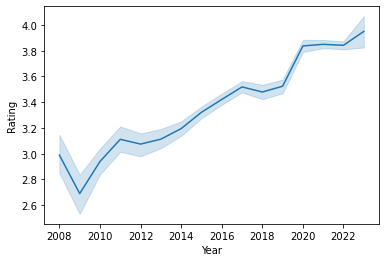

In [84]:
sns.lineplot(x=new_df['Year'],y=new_df['Rating'])

<AxesSubplot:xlabel='Rating', ylabel='count'>

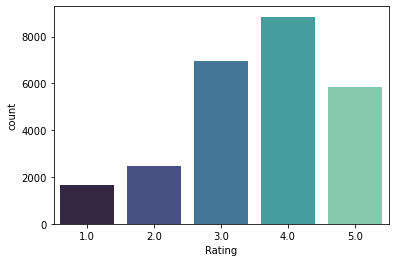

In [90]:
sns.countplot(data['Rating'],palette='mako')

In [101]:
banklevels=['Analyst','Associate','Vice President','VP','Senior Vice President','SVP','Managing Director','MD']

In [119]:
new_df['job_title'][2].split()

['Personal', 'Banker']

In [112]:
level=[]

for jobtitle in new_df['job_title']:
    for word in jobtitle.split():
        if word == [level for level in banklevels]:
            level.append(level)
        else:
            level.append(jobtitle)
        
            

In [116]:
len(new_df.job_title)

25773

In [114]:
len(level)

52693

In [98]:
new_df['job_title_new']

0                                          
1                             VicePresident
2                            PersonalBanker
3                     BankruptcySpecialist3
4        SeniorTrainer-Learning&Development
                        ...                
25885                     AnonymousEmployee
25886                AssistantVicePresident
25887                     AnonymousEmployee
25888              VicePresident-Technology
25889                     AnonymousEmployee
Name: job_title_new, Length: 25773, dtype: object